Team member 1 (name, email, id): Mhd Jawad Al Rahwanji, mhal00002@stud.uni-saarland.de, 7038980

Team member 2 (name, email, id): Christian Singer, chsi00002@stud.uni-saarland.de, 7039059

## Exercise 2.3 PCA for visualization purposes (3 points)

In this exercise you will perform visualization of [MNIST](http://yann.lecun.com/exdb/mnist/) dataset using PCA. The end result of this exercise should look like [Embedding Projector](https://projector.tensorflow.org/) (please select "Mnist with images" in the dropdown menu on the left of the page).  
Write your code in the respective cells. Of course, you can add additional cells or change their order, but please don't significantly change the structure of the notebook. You must use PyTorch tensors to perform all the calculations.  
For each question that requires written answer, please write it in a markdown cell.

In [21]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import plotly.express as px

#### Loading the data

In [22]:
# Download the dataset and save it to a local folder. You should use the train set.
mnist_dataset = torchvision.datasets.MNIST('data/', train=True, download=True)

X, Y = mnist_dataset.data, mnist_dataset.targets
print(X.shape)

X_flat = X.reshape(-1, 28*28).float()
print(X_flat.shape)

# We must make the data zero-centered before applying PCA
M = torch.mean(X_flat)
X_flat = X_flat - M

torch.Size([60000, 28, 28])
torch.Size([60000, 784])


### 2.2.1. Perform PCA on the input data (1 point)

Calculate covariance matrix of the input data. Hint: You can use torch.matmul for matrix multiplication.

In [23]:
cov_mat = torch.cov(X_flat.T)

Perform eigendecomposion of the covariance matrix. Hint: you can use torch.linalg.eig.

In [24]:
(eigenvalues, eigenvectors) = torch.linalg.eig(cov_mat)

### 2.2.2 Analyzing the results of PCA (1 point)

Extract the first two principal components of the data, i.e. reduce the dimensionality of the dataset to 2. Plot the result. Different numbers must be represented as different colors on the scatter plot. You can use a randomly sampled portion of the data so that the plot doesn't get cluttered.   
Describe whether it's possible to differentiate the numbers in 2 dimensions. Are there any additional observations?

In [25]:
indices = np.random.choice(X_flat.shape[0], 1000)
sample = X_flat[indices]

In [26]:
pc1 = torch.matmul(sample, eigenvectors.T[0].float())
pc2 = torch.matmul(sample, eigenvectors.T[1].float())

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

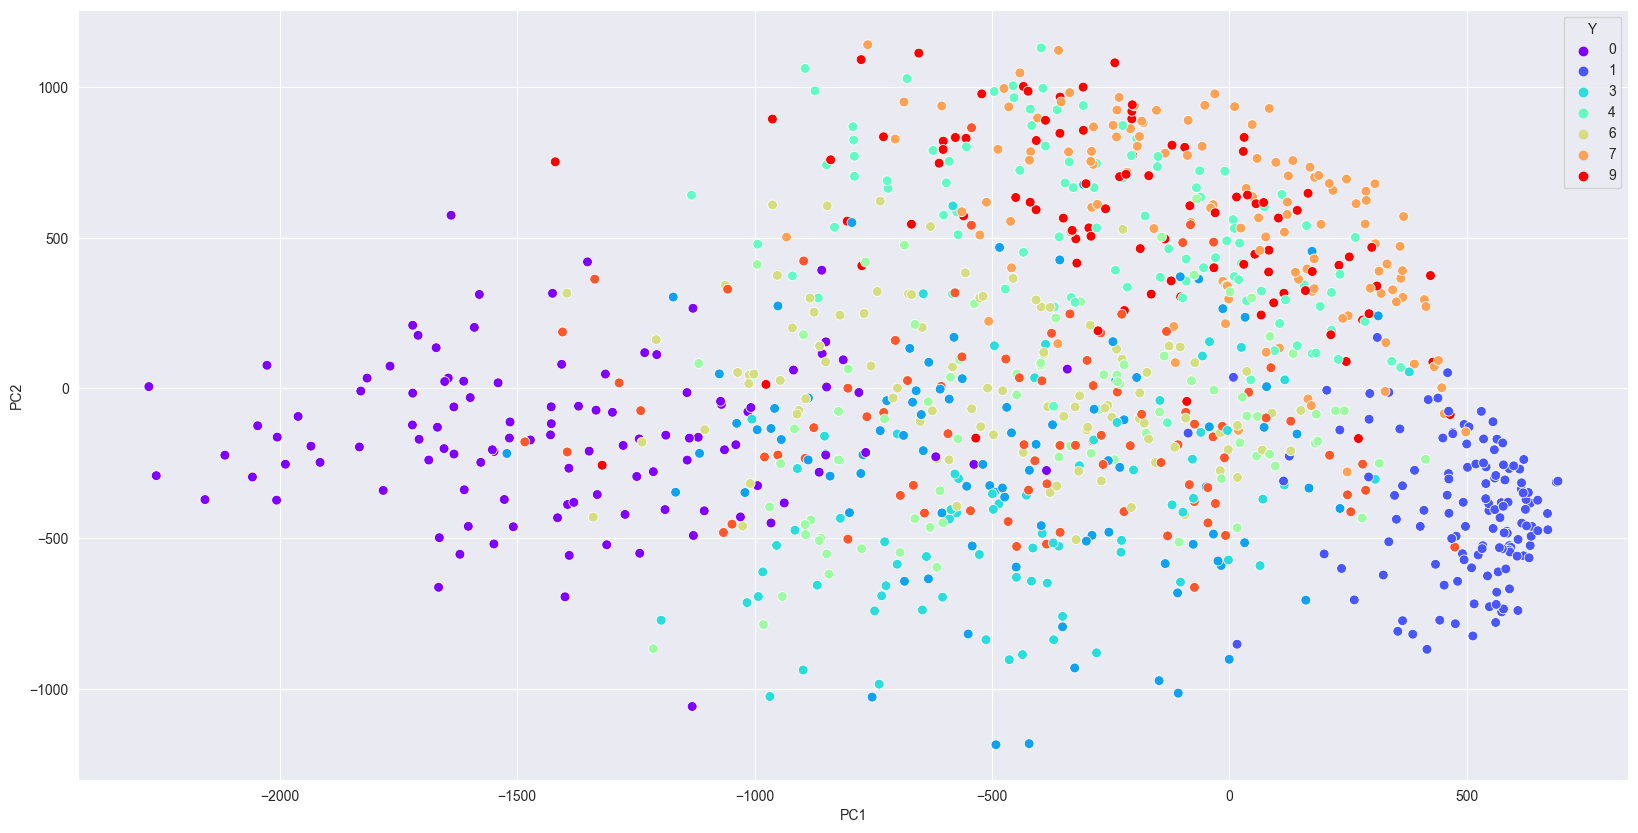

In [27]:
res = pd.DataFrame(pc1, columns=["PC1"])
res["PC2"] = pc2
res["Y"] = Y[indices]

plt.figure(figsize=(20, 10))
sns.scatterplot(x = res["PC1"], y = res["PC2"], hue=res["Y"], s=50, palette="rainbow")

##### Answer
It is not possible to differentiate between digits.
We note that datapoints of the digit "1" are clustered close together with little overlap with datapoints of other digits.

Plot the graph of cumulative explained variance vs number of components. You might also want to make an additional plot for the first N components. How many components should we use to describe the data? Motivate your answer.

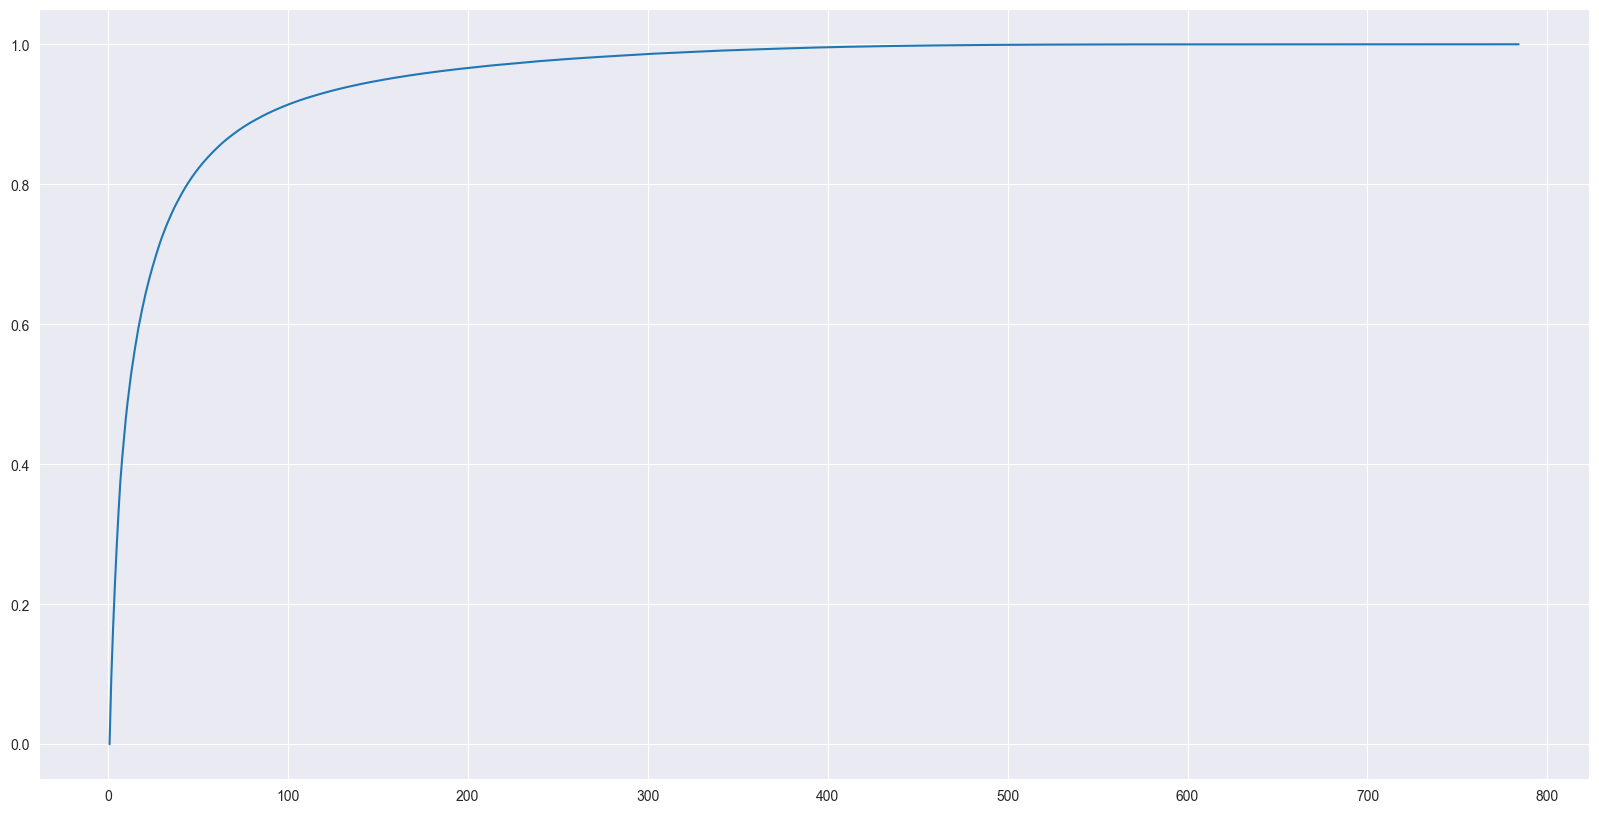

In [28]:
cumulative_explained_variances = []
for i in range(len(eigenvalues)):
    cumulative_explained_variances.append(torch.sum(eigenvalues[:i]).float() / torch.sum(eigenvalues).float())

plt.figure(figsize=(20, 10))
plt.plot(range(0+1, sample.shape[1]+1), cumulative_explained_variances)

##### Answer
We may need somewhere around 100 to 150 features. Using more would have diminishing returns, as it would require ~100 additional features to explain a small fraction of the data

### 2.2.3 Visualizing the data in 3 dimensions (1 point)

Reduce the dimensionality of the dataset to 3. Using Tensorboard visualize the resultant data in 3 dimensions. You should get the result similar to the [Embedding Projector](https://projector.tensorflow.org/) project (actually, they use the same Tensorboard package, so the result might be even exactly the same). You can use differently colored points instead of the digit pictures.

In [29]:
pc3 = torch.matmul(sample, eigenvectors.T[2].float())

In [30]:
res["PC3"] = pc3

fig = px.scatter_3d(res, x='PC1', y='PC2', z='PC3', color='Y')
fig.show()

Analyze the resultant plot.  
Is 3 dimensions considerably better than 2?  
Which digits stand out in 3D and which digits are difficult to differentiate in 3 dimensions?

##### Answer
No, 3d is not considerably better than 2d.
Digit 1 stands out still, 0 is appearing more clearly and 2 is ok. The rest are unrecognizable.